In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [6]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [19]:
def thompson(N, d, dataset, adSelected, numbersOfRewards0, numbersOfRewards1, totalReward): 
  for n in range(N):
    ad, maxRandom = 0, 0
    for i in range(d):
      randomBeta = random.betavariate(numbersOfRewards1[i] + 1,numbersOfRewards0[i] + 1 )
      if maxRandom < randomBeta:
        maxRandom = randomBeta
        ad = i
    adSelected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
      numbersOfRewards1[ad] += 1
    else:
      numbersOfRewards0[ad] += 1
    totalReward += reward

In [20]:
adSelected, numbersOfRewards0, numbersOfRewards1 = [], [0] * d, [0] * d
totalReward = 0
thompson(10000, 10, dataset, adSelected,  numbersOfRewards0, numbersOfRewards1, totalReward)

Text(0, 0.5, 'NUmber of times each ad is selected')

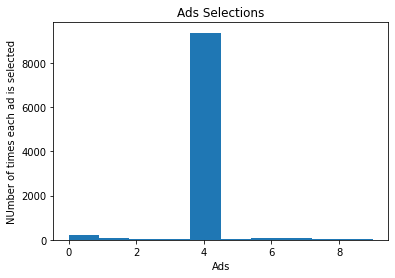

In [21]:
plt.hist(adSelected)
plt.title('Ads Selections')
plt.xlabel('Ads')
plt.ylabel('NUmber of times each ad is selected')

Now we have to check that at what minimun value our model was able to find correct ad by changing  N value

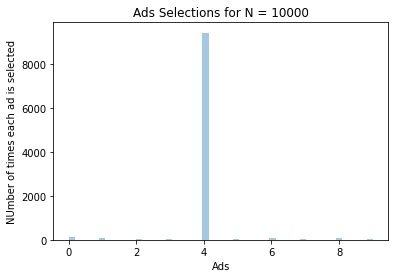

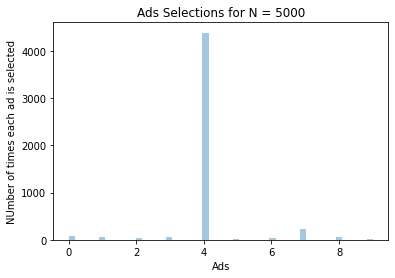

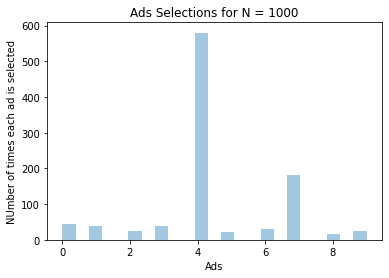

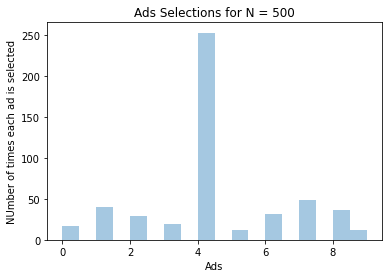

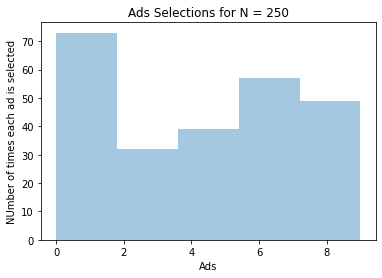

In [35]:
List = [10000,5000,1000,500,250]
for i in List:
  adSelected, numbersOfRewards0, numbersOfRewards1 = [], [0] * d, [0] * d
  totalReward = 0
  thompson(i, 10, dataset, adSelected,  numbersOfRewards0, numbersOfRewards1, totalReward)
  plt.figure(i) 
  sns.distplot(adSelected, kde=False)
  plt.title('Ads Selections for N = '+ str(i))
  plt.xlabel('Ads')
  plt.ylabel('NUmber of times each ad is selected')